In [ ]:
#look at clutch players
#do players shoot better in certain quarters
#predicting salaries based on shooting

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv("shot_logs2.csv")
lebron = data[data['player_name'].str.contains('lebron james')]
curry = data[data['player_name'].str.contains('stephen curry')]
#df.loc[df['A'] = df['B'], 'C'] == 0
data.loc[(data['DRIBBLES'] <= 1) & (data['SHOT_DIST']  > 4), 'SHOT_TYPE'] = 'Catch and Shoot'
data.loc[(data['DRIBBLES'] <= 1) & (data['SHOT_DIST']  <= 4), 'SHOT_TYPE'] = 'Cut'
data.loc[(data['DRIBBLES'] > 1) & (data['SHOT_DIST']  <= 4), 'SHOT_TYPE'] = 'Drive'
data.loc[(data['DRIBBLES'] > 1) & (data['SHOT_DIST']  > 4) & (data['PTS_TYPE'] == 2), 'SHOT_TYPE'] = 'Mid Range'
data.loc[data['DRIBBLES'] > 4, 'SHOT_TYPE'] = 'ISO/Post Up'
data.loc[data['DRIBBLES'] > 20, 'SHOT_TYPE'] = 'Long ISO'
data.loc[(data['DRIBBLES'] <= 1) & (data['PTS_TYPE']  == 3), 'SHOT_TYPE'] = 'Spot Up Three'

avg = []
data.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,SHOT_TYPE
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,Mid Range
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148,Spot Up Three
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148,Mid Range
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148,Mid Range
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148,Drive


In [122]:
dropped = data.dropna()
bins = [0,4,8,16,24,100]
dist = pd.cut(dropped['SHOT_DIST'], bins)
count = 1
for a,b in dropped.groupby(dist):
    counts = b.groupby('SHOT_RESULT')['SHOT_RESULT'].count()
    avg.append((count, counts[0]/(counts[0]+counts[1]),'NBA Average'))
    count += 1

In [123]:
curry = curry.dropna()
bins = [0,4,8,16,24,100]
dist = pd.cut(curry['SHOT_DIST'], bins)
count = 1
for a,b in curry.groupby(dist):
    counts = b.groupby('SHOT_RESULT')['SHOT_RESULT'].count()
    avg.append((count, counts[0]/(counts[0]+counts[1]),'stephen curry'))
    count += 1

In [124]:
lebron = lebron.dropna()
bins = [0,4,8,16,24,100]
dist = pd.cut(lebron['SHOT_DIST'], bins)
count = 1
for a,b in lebron.groupby(dist):
    counts = b.groupby('SHOT_RESULT')['SHOT_RESULT'].count()
    avg.append((count, counts[0]/(counts[0]+counts[1]),'lebron james'))
    count += 1

In [125]:
df = pd.DataFrame(avg)
df.columns = ['loc', 'perc', 'player']
#df = pd.melt(df, id_vars="loc", var_name="player", value_name="perc")
print (df)

    loc      perc         player
0     1  0.636201    NBA Average
1     2  0.484631    NBA Average
2     3  0.406732    NBA Average
3     4  0.397262    NBA Average
4     5  0.345389    NBA Average
5     1  0.702290  stephen curry
6     2  0.570175  stephen curry
7     3  0.563636  stephen curry
8     4  0.445887  stephen curry
9     5  0.400000  stephen curry
10    1  0.744444   lebron james
11    2  0.561321   lebron james
12    3  0.446970   lebron james
13    4  0.386792   lebron james
14    5  0.350711   lebron james


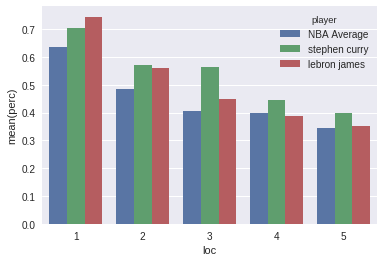

In [126]:
a = [1,2,3,4,5]
sns.barplot(x="loc", y="perc", hue='player', data=df)

In [131]:
avg2 = []
count = 1
for a,b in curry.groupby('CLOSEST_DEFENDER'):
    counts = b.groupby('SHOT_RESULT')['SHOT_RESULT'].count()
    print(counts)
    #avg2.append((count, counts[0]/(counts[0]+counts[1]),'stephen curry'))
    #count += 1
avg2

SHOT_RESULT
made    1
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made      2
missed    3
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
missed    3
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made      1
missed    2
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
missed    1
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made      1
missed    1
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
missed    1
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made    1
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made      3
missed    6
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made      1
missed    2
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
missed    1
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made      1
missed    2
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made    1
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made      3
missed    2
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
missed    1
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made    3
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made      4
miss

Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made      1
missed    2
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made      4
missed    3
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made      4
missed    1
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made      1
missed    3
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made      2
missed    1
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made    2
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made    3
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made      4
missed    2
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
missed    1
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made      5
missed    8
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made      2
missed    1
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made      1
missed    1
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made    1
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made      2
missed    2
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
made    1
Name: SHOT_RESULT, dtype: int64
SHOT_RESULT
miss

[]